# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

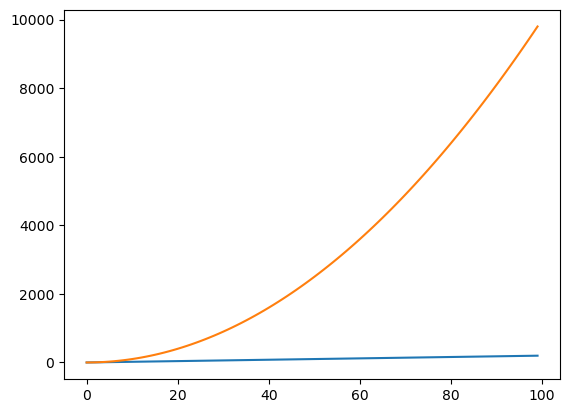

In [4]:
# Method 1
plt.plot(x,y)
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

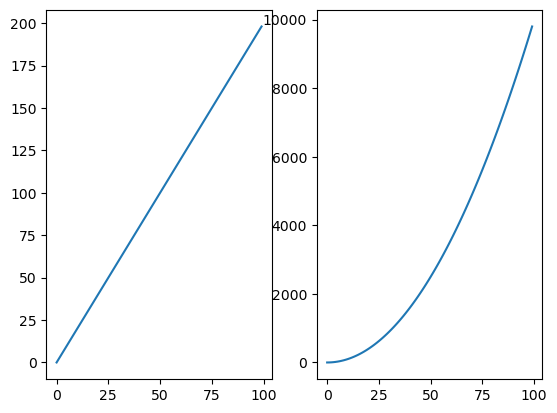

In [5]:
# Method 2
fig, [plot1, plot2] = plt.subplots(1,2)
plot1.plot(x,y)
plot2.plot(x,z)

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

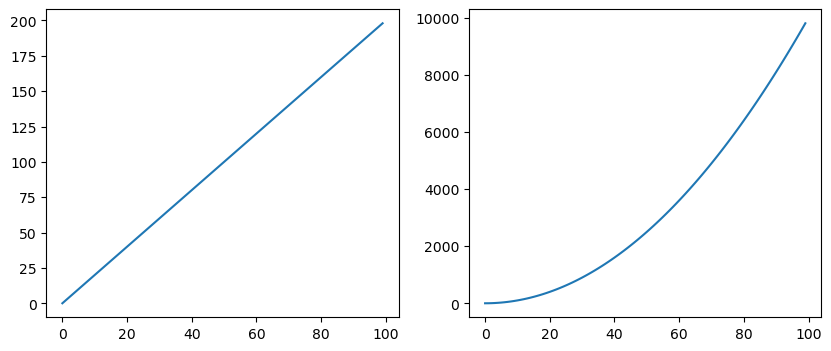

In [6]:
# your code here
fig, [plot1, plot2] = plt.subplots(1, 2, figsize=(10,4))
plot1.plot(x,y)
plot2.plot(x,z)

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

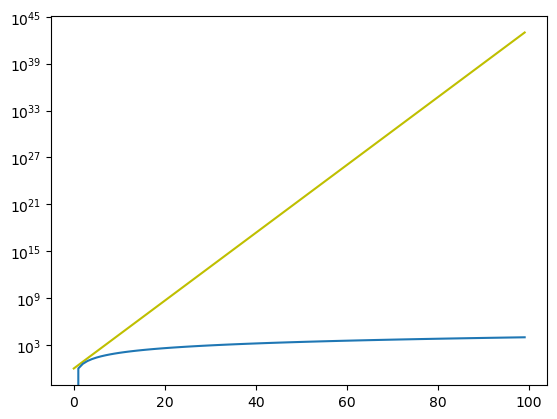

In [7]:
# your code here  
y = x**2.0
y2 = np.exp(x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(x,y2, 'y', label='y=e^x')
ax.plot(x,y,  label='y=x^2')

ax.set_yscale("log")
ax.set_xscale("linear")

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

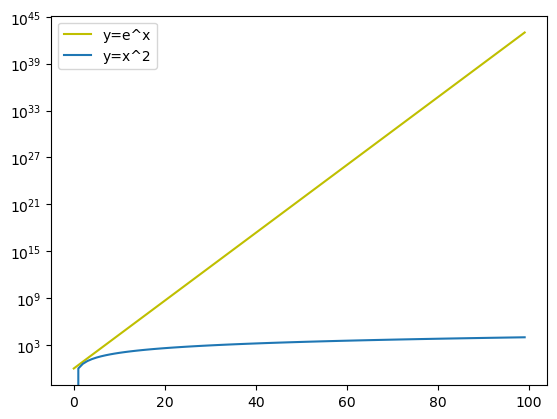

In [8]:
# your code here
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(x,y2, 'y', label='y=e^x')
ax.plot(x,y,  label='y=x^2')
ax.legend(loc='upper left')

ax.set_yscale("log")
ax.set_xscale("linear")

plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
fitbit = pd.read_csv("fitbit2.csv")
fitbit.head()
#fitbit.columns

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

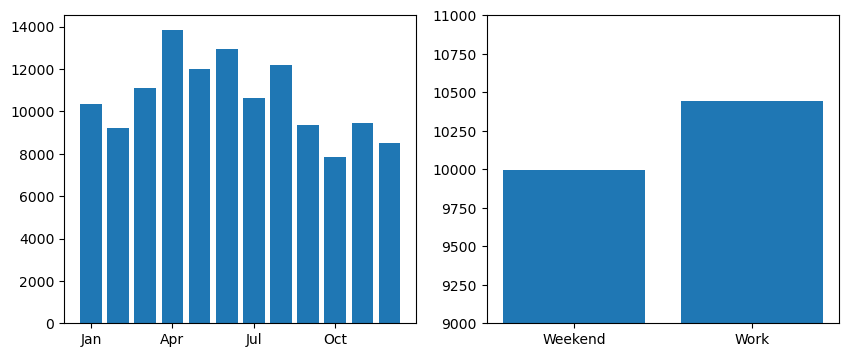

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
fig, [plot1, plot2] = plt.subplots(1, 2, figsize=(10,4))

fitbit_steps_by_month = fitbit.groupby('Months_encoded').agg({'Steps':'median'}).reset_index()
plt.sca(plot1)
plot1.bar(fitbit_steps_by_month["Months_encoded"], fitbit_steps_by_month["Steps"]) 
plt.xticks([1,4,7,10],["Jan","Apr","Jul","Oct"])

 
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
fitbit_steps_by_work = fitbit.groupby('Work_or_Weekend').agg({'Steps':'median'}).reset_index()
plt.sca(plot2)
plot2.bar(fitbit_steps_by_work["Work_or_Weekend"], fitbit_steps_by_work["Steps"]) 
plt.xticks([0,1],["Weekend","Work"])
plt.ylim(9000,11000)

plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

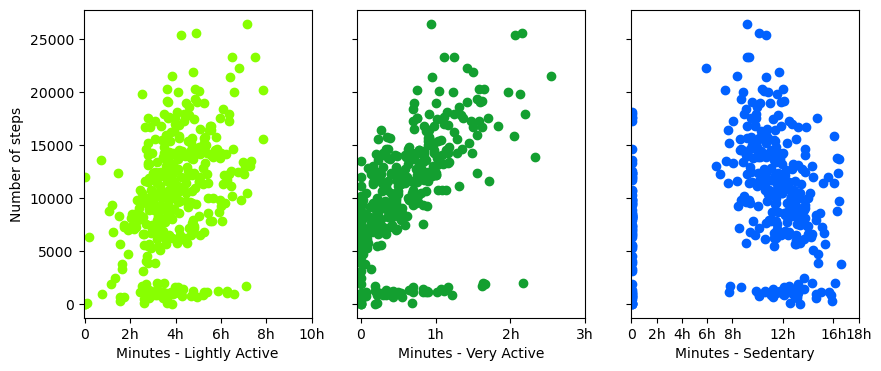

In [43]:
# your code here
fig, [plot1, plot2, plot3] = plt.subplots(1, 3, figsize=(10,4))
plt.sca(plot1)
plt.ylabel("Number of steps")
plt.xlabel("Minutes - Lightly Active")
plt.xticks([0,120,240,360,480,600],["0","2h","4h","6h","8h","10h"])
plot1.scatter(fitbit["Minutes Lightly Active"], fitbit["Steps"], c="#88FF01") 
plt.xlim(-3,600)

plt.sca(plot2)
plt.yticks([0,5000,10000,15000,20000,25000],[])
plt.xlabel("Minutes - Very Active")
plt.xticks([0,60,120,180],["0","1h","2h","3h"])
plot2.scatter(fitbit["Minutes Very Active"], fitbit["Steps"], c="#139F30") 
plt.xlim(-3,180)

plt.sca(plot3)
plt.yticks([0,5000,10000,15000,20000,25000],[])
plt.xlabel("Minutes - Sedentary")
plt.xticks([0,120,240,360,480,720,960,1080],["0","2h","4h","6h","8h","12h","16h","18h"])
plot3.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"], c="#0161FF") 
plt.xlim(-3,1080)

plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [48]:
# your code here
titanic = pd.read_csv("titanic.csv")
titanic.head()
#titanic.info()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [49]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [50]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(exclude=object)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [51]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [129]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

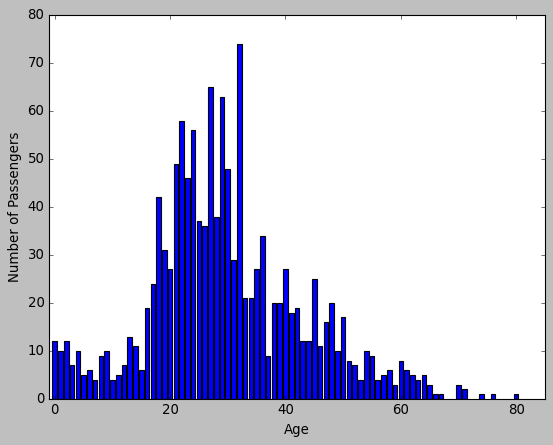

In [130]:
# your code here
plt.xlabel("Age")
plt.ylabel("Number of Passengers")

#to get a bar chart, we need to make sure that the content is aggregated right
titanic["Age_int"] = titanic["Age"].astype(int)
titanic_ages = titanic.groupby("Age_int").agg({"PassengerId":"count"}).reset_index()

plt.bar(titanic_ages["Age_int"],titanic_ages["PassengerId"])
plt.xlim(-1,85)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [245]:
#data prep
#(20, 30] #means 20 is not included, only > 20. 30 is included in it.
mylabels10 = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80"]
bins_step10 = pd.cut(titanic['Age_int'], [0, 10, 20, 30, 40, 50, 60, 70, 80], labels = mylabels10, retbins=True)
bins_step10[0]#.value_counts()
titanic["bins10"] = bins_step10[0]
titanic_bin10 = titanic.groupby("bins10").agg({"PassengerId":"count"}).reset_index()

mylabels20 = ["0-20", "21-40", "41-60", "61-80"]
bins_step20 = pd.cut(titanic['Age_int'], [0, 20, 40, 60, 80], labels = mylabels20, retbins=True)
bins_step20[0].value_counts()
titanic["bins20"] = bins_step20[0]
titanic_bin20 = titanic.groupby("bins20").agg({"PassengerId":"count"}).reset_index()

mylabels50 = ["0-50", "51-100"]
bins_step50 = pd.cut(titanic['Age_int'], [0, 50, 100], labels = mylabels50, retbins=True)
bins_step50[0].value_counts()
titanic["bins50"] = bins_step50[0]
titanic_bin50 = titanic.groupby("bins50").agg({"PassengerId":"count"}).reset_index()

titanic.head(50)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,bins10,bins20,bins50
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S,22,21-30,21-40,0-50
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,38,31-40,21-40,0-50
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S,26,21-30,21-40,0-50
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,35,31-40,21-40,0-50
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S,35,31-40,21-40,0-50
5,6,0.0,3,"Moran, Mr. James",male,23.926502,0,0,330877,8.4583,U0,Q,23,21-30,21-40,0-50
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,54,51-60,41-60,51-100
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U0,S,2,0-10,0-20,0-50
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S,27,21-30,21-40,0-50
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,U0,C,14,11-20,0-20,0-50


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


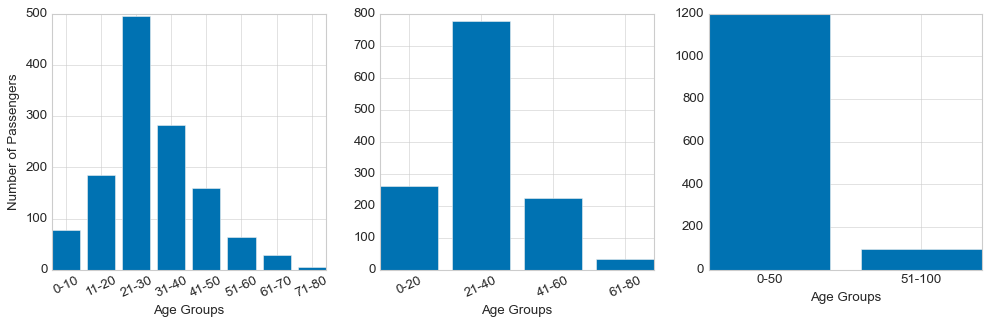

In [146]:
# your code here
#print(plt.style.available)

fig, [plot1, plot2, plot3] = plt.subplots(1, 3, figsize=(15,4))
plt.style.use('fivethirtyeight')

plt.sca(plot1)
plt.ylabel("Number of Passengers")
plt.xlabel("Age Groups")
plt.xticks(rotation=25) 
plot1.bar(titanic_bin10["bins10"], titanic_bin10["PassengerId"]) 

plt.sca(plot2)
plt.xlabel("Age Groups")
plt.xticks(rotation=25) 
plot2.bar(titanic_bin20["bins20"], titanic_bin20["PassengerId"]) 

plt.sca(plot3)
plt.xlabel("Age Groups")
plot3.bar(titanic_bin50["bins50"], titanic_bin50["PassengerId"]) 

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
Bin size changes how the data is grouped. 
If more data is grouped in less groups, there is will be less groups (above on the x-axis), but at the same time 
higher values for those groups (y-axis). So the third Graph with only two groups shows (maybe) an over-grouping, 
you can't gain much information out of that graph, only that a large majority of people were under 50.
With more groups you can get a finer resolution, a better picture, but it could also get harder to analyse and 
see trends.

"""

#### Use seaborn to show the distribution of column `Age`.

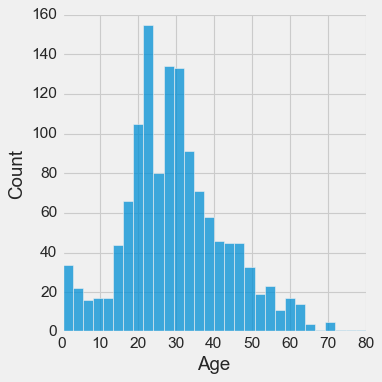

In [149]:
sns.displot(titanic, x="Age")

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

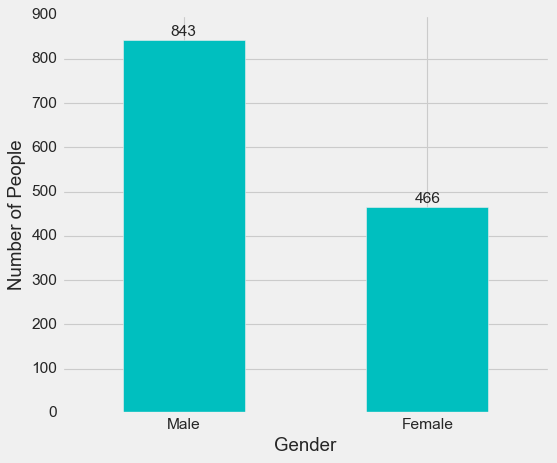

In [165]:
# Method 1 - matplotlib
# your code here
gender = titanic['Gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="c")
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

#label the bars with the absolute number above:
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

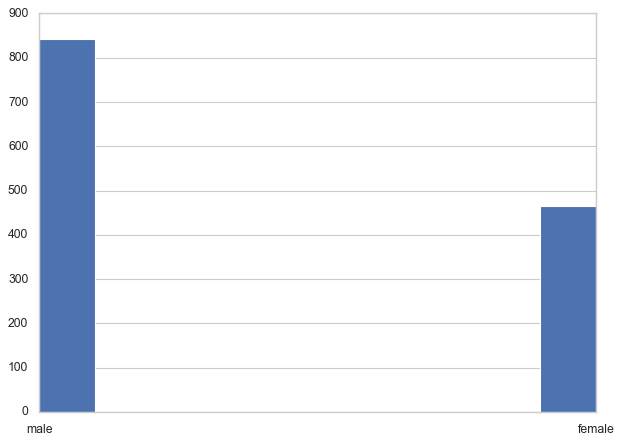

In [237]:
#another posibility but not styled here:
plt.hist(x="Gender",data=titanic)
plt.show()

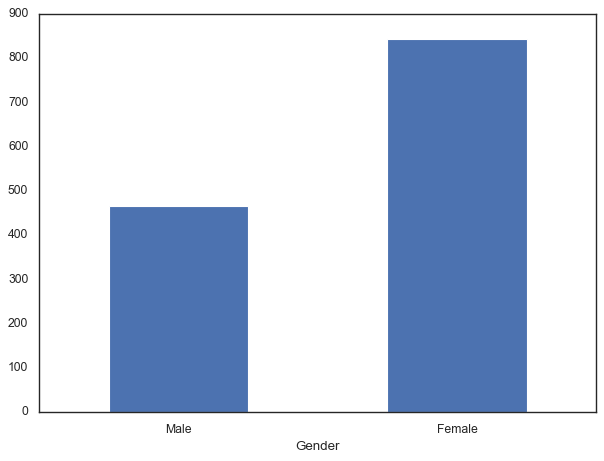

In [216]:
# Method 2 - seaborn
# your code here
titanic_gender = titanic.groupby("Gender").agg({"PassengerId":"count"}).reset_index()
sns.set(style='white')
sns_plot = titanic_gender.set_index("Gender").plot(kind='bar')
sns_plot.set_xticks((0,1), labels=("Male","Female"), rotation=0)
sns_plot.legend([],[], frameon=False)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

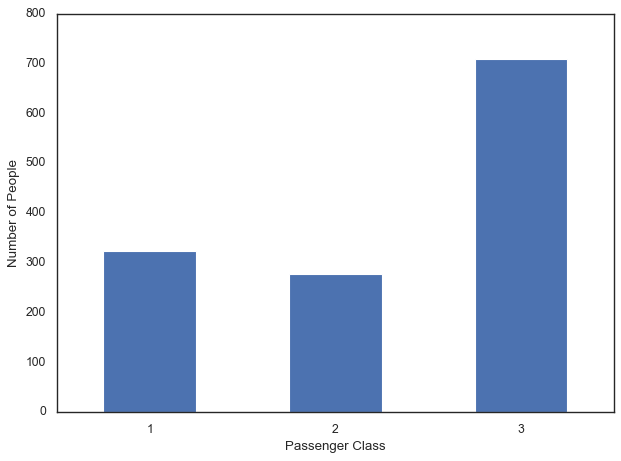

In [215]:
##### your code here
titanic_pclass = titanic.groupby("Pclass").agg({"PassengerId":"count"}).reset_index()

sns_plot = titanic_pclass.set_index("Pclass").plot(kind='bar')
sns_plot.set_xticks(titanic_pclass["Pclass"].index, labels=titanic_pclass["Pclass"], rotation=0)
sns_plot.set(xlabel='Passenger Class', ylabel='Number of People')
sns_plot.legend([],[], frameon=False)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

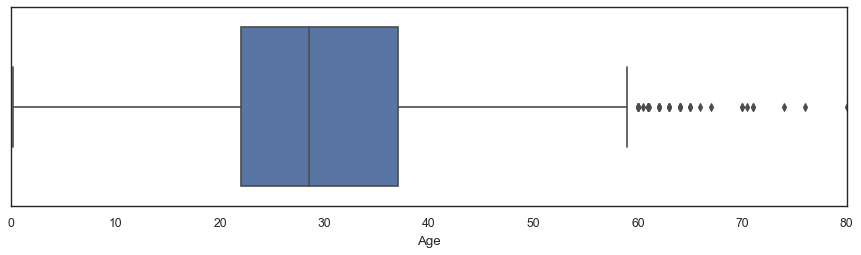

In [220]:
# your code here
plt.figure(figsize=(12, 3))
sns.boxplot(x = "Age", data = titanic)
plt.show()

"""
your comments here
The boxplot shows all descriptive statistic values in one.
The blue body shows the interval in which 50% of the data fall. This is the IQR. The line inside it shows the median. 
Left of the line is the lower 25% quartile, on the right the upper 25% quartile.
The whiskers show the minimum and the maximum value (excluding outliers). 
Any value that is bigger or lower than 1.5*IQR is an outlier. The outliers are symbolised by the dots behind the upper whisper. 
"""

#### What does the last plot tell you about the feature `Age`?

In [221]:
titanic["Age"].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

In [ ]:
"""
your comments here
Interpretation: The median age of passengers was around 28, 50% of the passengers were between 22 and 37. 
Any person above 59 can be considered an outlier, even though there was some. 
On the lower end there is no outliers, the lowest whisker goes down until 0.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

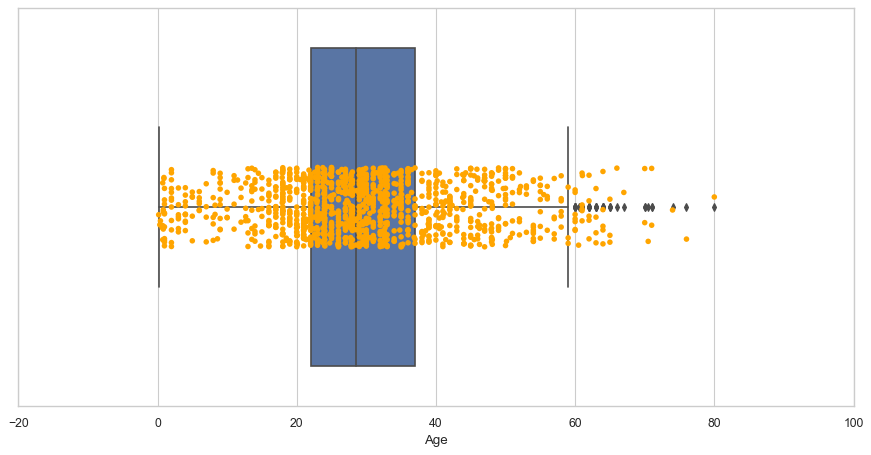

In [243]:
# your code here
plt.figure(figsize=(12, 6))
sns.color_palette()
ax = sns.boxplot(x='Age',data=titanic)
ax = sns.stripplot(x="Age",data=titanic,color="orange")
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
Hm, it is hard too read. There is lots of dots inside the Interquartile range (50%). 
Past the upper whisper there is still datapoints, but not so dense.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

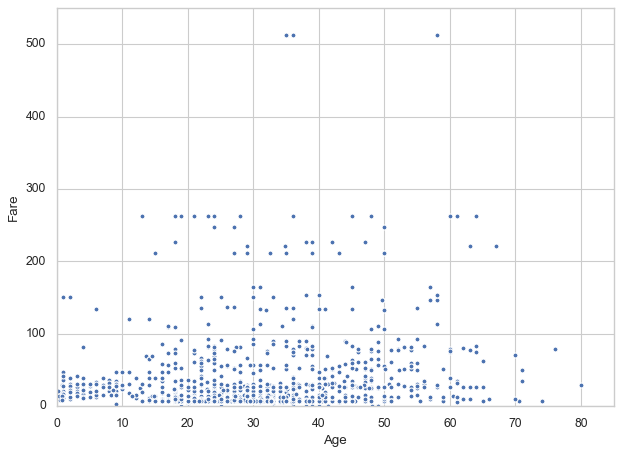

In [248]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic["Age"], titanic["Fare"]) 
plt.xlabel("Age")
plt.ylabel("Fare")
plt.xlim(0,85)
plt.ylim(0,550)
plt.show()

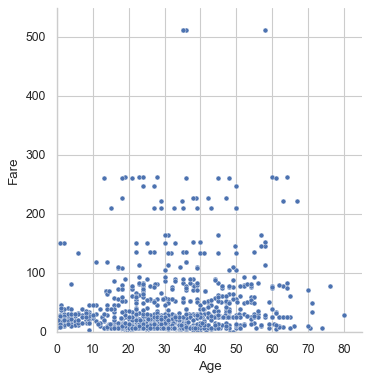

In [250]:
# Method 2 - seaborn
# your code here
sns.relplot(x ="Age", y ="Fare", data = titanic);
plt.xlabel("Age")
plt.ylabel("Fare")
plt.xlim(0,85)
plt.ylim(0,550)
plt.show()

#### Plot the correlation matrix using seaborn.

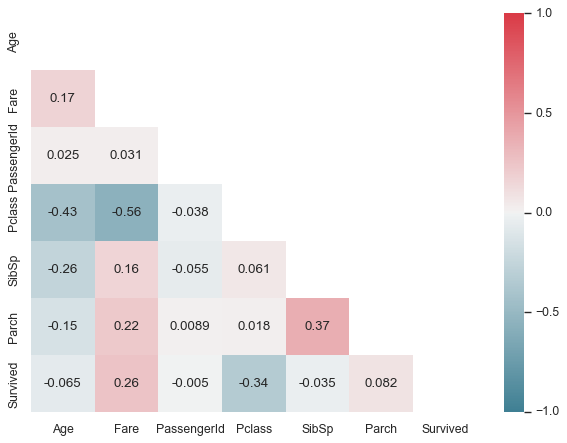

In [266]:
# your code here
#titanic_corr = titanic[["Age","Fare"]].corr()
titanic_corr = titanic[["Age","Fare","PassengerId","Pclass","SibSp","Parch","Survived"]].corr()

mask = np.triu(np.ones_like(titanic_corr, dtype=bool))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(titanic_corr, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=-1)
plt.show()

#### What are the most correlated features?

In [ ]:
"""
your comments here
Looking at all numeric columns, the most positive correlated features are Parch and SibSp.
The highest, but negative correlaction exists between Pclass and Fare.
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

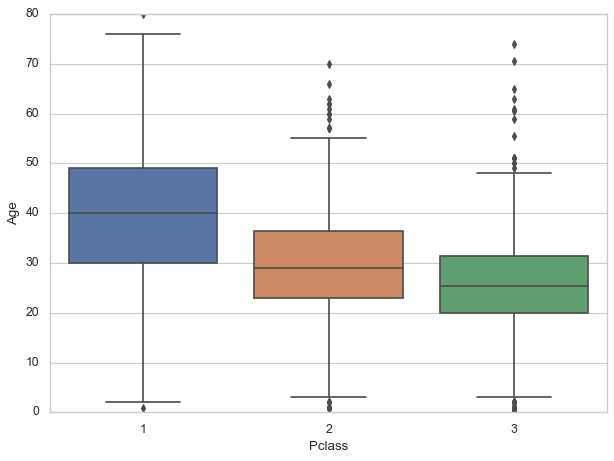

In [272]:
# your code here
sns.boxplot(x = "Pclass", y = "Age", data = titanic)
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

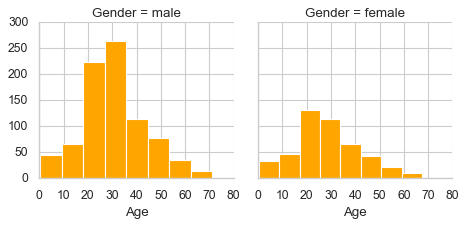

In [281]:
# your code here
graph = sns.FacetGrid(titanic, col ='Gender')
graph.map(plt.hist, 'Age', bins = 9, color ='orange')

plt.show()